# WordClouds & NLP - Wine Review dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

## Download the Wine Review Dataset
* available from Kaggle

In [5]:
df = pd.read_csv('../../Downloads/winemag-data-130k-v2.csv', index_col=0)

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Explore the data 

In [8]:
print('There are {} observations and {} features \n'.format(df.shape[0], df.shape[1]))
print('There are {} wine types such as {}... \n'.format(len(df.variety.unique()),
                                                        ', '.join(df.variety.unique()[0:3])))
print('There are {} countries producing the wine such as {}... \n'.format(len(df.country.unique()),
                                                                         ', '.join(df.country.unique()[0:3])))

There are 129971 observations and 13 features 

There are 708 wine types such as White Blend, Portuguese Red, Pinot Gris... 

There are 44 countries producing the wine such as Italy, Portugal, US... 



In [9]:
df[['country', 'description', 'points']].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


### groupby( ) - allows comparisons of values within a feature

In [10]:
country = df.groupby('country')

country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

### View the top 5 countries, by highest points (Average)

In [11]:
country.mean().sort_values(by='points', ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


### Plot the number of wines per country

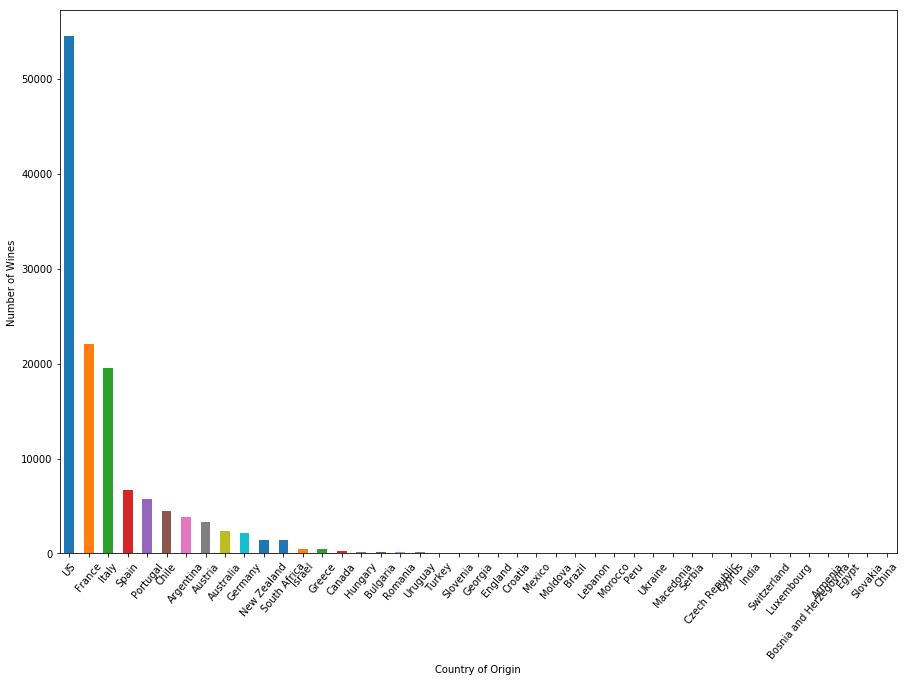

In [13]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()

plt.xticks(rotation=50)
plt.xlabel('Country of Origin')
plt.ylabel('Number of Wines')
plt.show()

### Plot the countries, by the highest rated wine

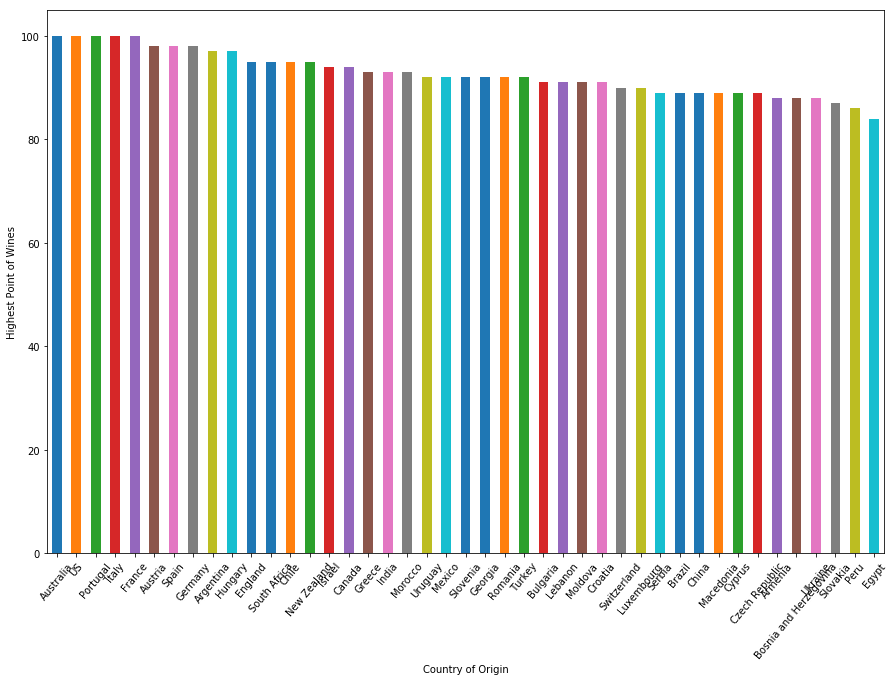

In [14]:
plt.figure(figsize=(15,10))
country.max().sort_values(by='points', ascending=False)['points'].plot.bar()

plt.xticks(rotation=50)
plt.xlabel('Country of Origin')
plt.ylabel('Highest Point of Wines')
plt.show()

## Setup WordCloud
* technique for showing the most frequent words
* ?WordCloud - presents the docstring descriptions for the function

In [15]:
?WordCloud

### Use the 1st observation's descriptive text - as WordCloud input
* extract the text
* create the wordcloud image
* display the cloud - use matplotlib

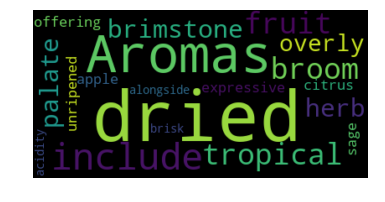

In [17]:
text = df.description[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Alter some arguments of the WordCloud

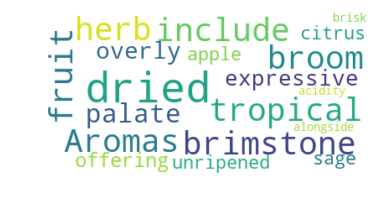

In [18]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### interpolation='bilinear' - argument displays image more clearly

In [20]:
text = ' '.join(review for review in df.description)

print('There are {} words in the combination of all reviews'.format(len(text)))

There are 31661073 words in the combination of all reviews


### Combine all wine reviews into 1 text - Create a WordCloud for all characteristics

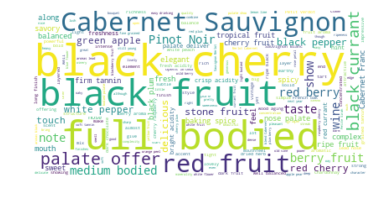

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(['drink', 'now', 'wine', 'flavor', 'flavors'])

wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### To select a Shape of the WordCloud - select a PNG file
* select a wine glass png
* numpy array - needed to make sure Mask works properly
* pixel values of 255 represent 'white' - values of 0 represent 'black'

In [52]:
wine_mask = np.array(Image.open('../../Desktop/stock-vector-set-transparent-vector-wine-glasses-empty-with-white-and-red-wine-on-transparent-background-562464043.png'))
wine_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [229, 230, 232],
        [230, 231, 233],
        [231, 232, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [229, 230, 232],
        [230, 231, 233],
        [231, 232, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [229, 230, 232],
        [230, 231, 233],
        [231, 232, 234]],

       ...,

       [[ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57],
        ...,
        [ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57]],

       [[ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57],
        ...,
        [ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57]],

       [[ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57],
        ...,
        [ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57]]

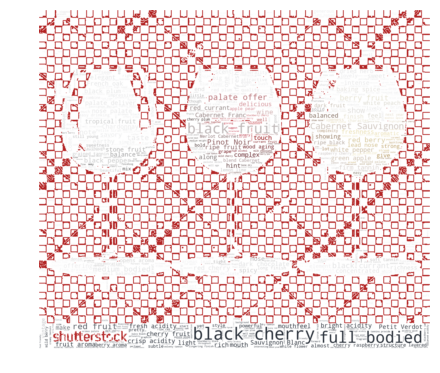

In [53]:
wc = WordCloud(stopwords=stopwords, background_color='white', max_words=1000, mask=wine_mask,
              contour_width=3, contour_color='firebrick')

wc.generate(text)

image_colors = ImageColorGenerator(wine_mask)

plt.figure(figsize=(7,7))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')

plt.savefig('../../Desktop/wine4.png')

plt.show()

### Now the WordCloud is in the shape on wine glasses
### The reviews associated with each country can also be isolated
* Create WordClouds - with the shape and color of country Flags

In [30]:
country.size().sort_values(ascending=False).head()

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

### use the top 5 countries (by number of wines)

In [31]:
country.size().sort_values(ascending=False).head(10)

country
US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
dtype: int64

### Concatenate reviews for each country

In [32]:
usa = ' '.join(review for review in df[df['country']=='US'].description)
fra = ' '.join(review for review in df[df['country']=='France'].description)
ita = ' '.join(review for review in df[df['country']=='Italy'].description)
spa = ' '.join(review for review in df[df['country']=='Spain'].description)
por = ' '.join(review for review in df[df['country']=='Portugal'].description)

### Create WordCloud following a color mapping
* Fine PNG images for flags
* color mapping done using ImageColorGenerator( )

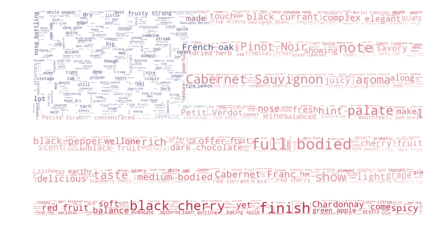

In [33]:
mask = np.array(Image.open('../../Desktop/1280px-Flag_of_the_United_States.svg.png'))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color='white', mode='RGBA',
                         max_words=1000, mask=mask).generate(usa)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(7,7))
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')

plt.show()

### Repeat this for France, Italy, Spain, and Portugal
* NOTE - Save the image after plotting for WordClouds with the desired colors

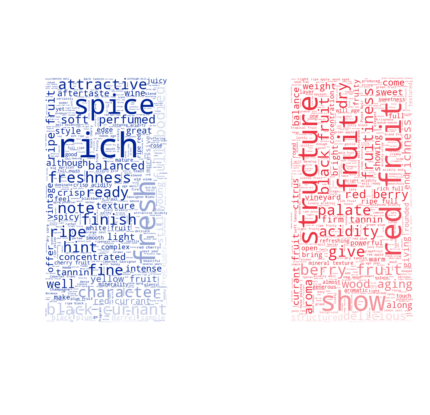

In [36]:
mask = np.array(Image.open('../../Desktop/FR-France-Flag-icon.png'))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color='white', mode='RGBA',
                          max_words=1000, mask=mask).generate(fra)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(7,7))
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')

plt.savefig('../../Desktop/fra_flag_wine', format='png')

plt.show()

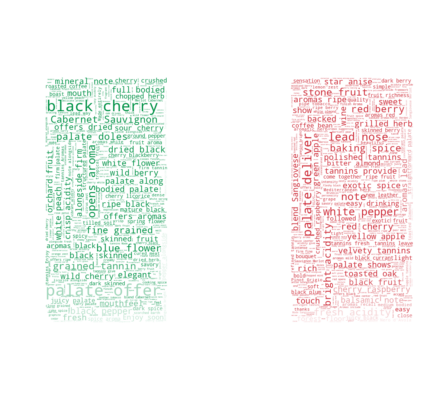

In [37]:
mask = np.array(Image.open('../../Desktop/IT-Italy-Flag-icon.png'))
wordcloud_ita = WordCloud(stopwords=stopwords, background_color='white', max_words=1000,
                         mask=mask).generate(ita)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(7,7))
plt.imshow(wordcloud_ita.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')

plt.savefig('../../Desktop/ita_flag_wine.png')

plt.show()

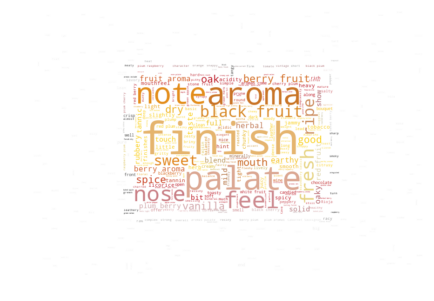

In [42]:
mask = np.array(Image.open('../../Desktop/country-europe-flag-identity-nation-spain-world-icon-341423.png'))
wordcloud_spa = WordCloud(stopwords=stopwords, background_color='white', max_words=1000,
                         mask=mask).generate(spa)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(7,7))
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')

plt.savefig('../../Desktop/spa_flag_wine.png')

plt.show()

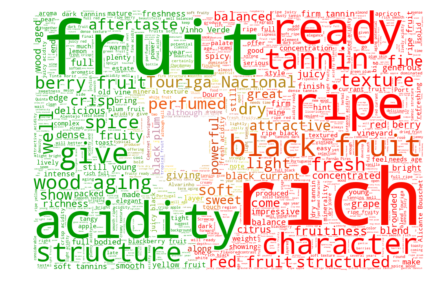

In [45]:
mask = np.array(Image.open('../../Desktop/portugal-26886_960_720.png'))
wordcloud_por = WordCloud(stopwords=stopwords, background_color='white', max_words=1000,
                         mask=mask).generate(por)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=(7,7))
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')

plt.savefig('../../Desktop/por_flag_wine.png')

plt.show()